In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 1991-2008 election data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5749,Mymensingh-8,1991,JaPa,Khurram Khan Chowdhury,18209.0,24.68,yes
5805,Barguna-2,1991,Independent,Nurul Islam Moni,19616.0,28.41,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes


In [7]:
dfcwin.shape

(1150, 7)

In [8]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [9]:
# find total wins across 4 elections by Jamaat and JaPa
dfcwinjjp = dfcwin.groupby(['seat', 'party']).size().unstack(fill_value=0)[bigp].drop(mainp, axis=1)
dfcwinjjp.head()

party,Jamaat,JaPa
seat,,
Bagerhat-1,0,0
Bagerhat-2,0,0
Bagerhat-3,0,0
Bagerhat-4,2,0
Bandarban,0,0


In [10]:
# sum the total wins by Jamaat and JaPa for each seat
dfcwinjjp['total'] = dfcwinjjp.sum(axis=1)
dfcwinjjp.head()

party,Jamaat,JaPa,total
seat,,,
Bagerhat-1,0,0,0
Bagerhat-2,0,0,0
Bagerhat-3,0,0,0
Bagerhat-4,2,0,2
Bandarban,0,0,0


In [11]:
# filter out data where Jamaat and JaPa combinedly won less than 2 times
dfcwinjjp.drop(dfcwinjjp[dfcwinjjp.total < 2].index, inplace=True)
dfcwinjjp.head()

party,Jamaat,JaPa,total
seat,,,
Bagerhat-4,2,0,2
Chittagong-14,3,0,3
Dinajpur-6,2,0,2
Gaibandha-1,1,3,4
Gaibandha-3,0,3,3


In [12]:
# find which party has the stronghold among the two
dfcwinjjp['party'] = dfcwinjjp[['Jamaat', 'JaPa']].idxmax(axis=1)
dfcwinjjp.head()

party,Jamaat,JaPa,total,party
seat,,,,
Bagerhat-4,2,0,2,Jamaat
Chittagong-14,3,0,3,Jamaat
Dinajpur-6,2,0,2,Jamaat
Gaibandha-1,1,3,4,JaPa
Gaibandha-3,0,3,3,JaPa


In [13]:
dfcwinjjp.to_csv('dataout/jjp_stronghold.csv')

In [16]:
# join data with map data
mapjjp = pd.merge(bdmap, dfcwinjjp, how='left', left_on='seat', right_index=True)
mapjjp.pop('Jamaat')
mapjjp.pop('JaPa')
mapjjp.pop('total')
mapjjp.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,party
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",NaN
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",NaN
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",NaN
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",NaN
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",NaN


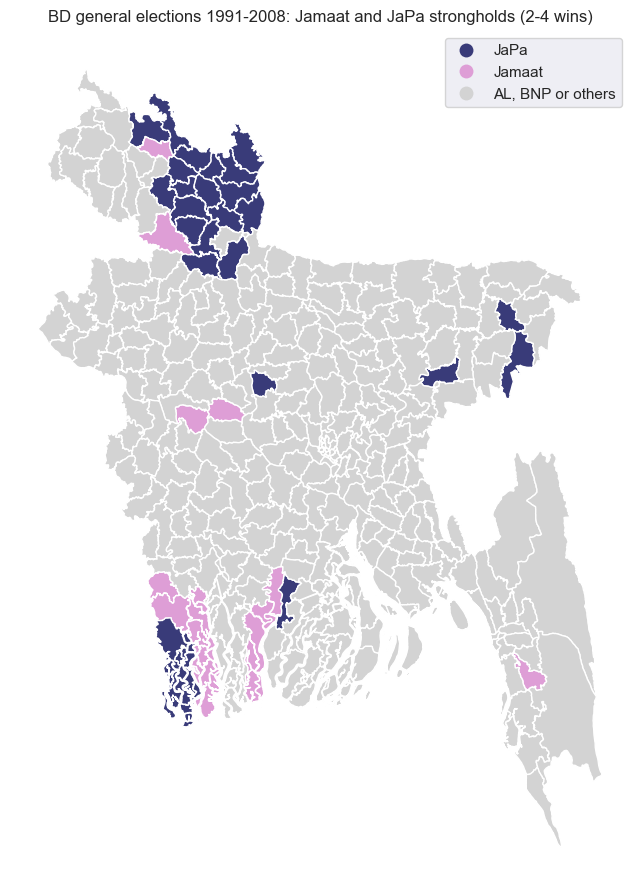

In [17]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
mapjjp.plot(
    column='party', 
    categorical=True,
    cmap='tab20b', 
    legend=True, 
    ax=ax, 
    missing_kwds={
        "color": "lightgrey",
        "label": "AL, BNP or others",
    }
)
ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: Jamaat and JaPa strongholds (2-4 wins)")
fig.savefig('fig/jjp_stronghold',bbox_inches='tight')

In [21]:
# save interactive map
fol = mapjjp.explore(
    column="party", 
    tooltip=False, 
    popup=True, 
    cmap='plasma', 
    style_kwds=dict(color="lightgrey"), 
)

fol.save('mapout/jjp_stronghold.html')